# 第 2 章第 3 节-Pandas 基础知识

说明：这部分内容在书本第 32 页。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

有了 NumPy 为什么还要 Series 和 DataFrame 呢？因为 Series 可以自定义 index，我们就可以发挥 index 的作用，而不仅仅只是用数字去索引我们要的数据了。

其中 DataFrame 是表格，Series 一方面可以看成单独的数组，另一反面可以认为是 DataFrame 的一行或者一列。

In [2]:
# Series 对象可以理解为一维数组
s = pd.Series([4, 2, 5, 0, 6, 3])
s

0    4
1    2
2    5
3    0
4    6
5    3
dtype: int64

有了 DataFrame ，我们还可以定义 column，这也极大地方便了我们从列的方向上索引数据，试想一下，如果你的 data 只有数字，而没有列名，就不能方便地索取某一列。

In [3]:
# DataFrame 是二维数组对象
df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.223367,0.644460,-0.257037,0.484014
1,0.716343,1.886733,-0.079501,-0.035769
2,-0.510711,-0.336682,0.140136,0.344299
3,1.181961,0.371334,-0.656309,1.293017
4,0.188773,-1.075473,0.319326,0.044853
5,-1.254207,-1.295904,0.097133,-0.724219


## 访问数据框一行数据

你可以使用默认的数字索引，索引到一行数据。

In [4]:
df.iloc[0]

A   -0.223367
B    0.644460
C   -0.257037
D    0.484014
Name: 0, dtype: float64

也可以使用你自定义的有意义的列的名称选取一列。

In [5]:
df.A

0   -0.223367
1    0.716343
2   -0.510711
3    1.181961
4    0.188773
5   -1.254207
Name: A, dtype: float64

In [6]:
# 和上一种方式等价
df['A']

0   -0.223367
1    0.716343
2   -0.510711
3    1.181961
4    0.188773
5   -1.254207
Name: A, dtype: float64

`DataFrame` 的一行或者一列都是 `Series` 对象。

In [7]:
print("Row data type: {}".format(type(df.iloc[0])))
print("Column data type: {}".format(type(df.A)))

Row data type: <class 'pandas.core.series.Series'>
Column data type: <class 'pandas.core.series.Series'>


In [8]:
df.shape

(6, 4)

看头几行或者尾几行预览，是很常用的额方法，尤其是 `head()`。

In [9]:
df.head(3)

,A,B,C,D
0,-0.223367,0.644460,-0.257037,0.484014
1,0.716343,1.886733,-0.079501,-0.035769
2,-0.510711,-0.336682,0.140136,0.344299


In [10]:
df.tail(2)

,A,B,C,D
4,0.188773,-1.075473,0.319326,0.044853
5,-1.254207,-1.295904,0.097133,-0.724219


看看列索引 column，看看行索引，默认的行索引是 `RangeIndex` 对象。

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.016465,0.032411,-0.072709,0.234366
std,0.874979,1.187943,0.347117,0.666772
min,-1.254207,-1.295904,-0.656309,-0.724219
25%,-0.438875,-0.890775,-0.212653,-0.015614
50%,-0.017297,0.017326,0.008816,0.194576
75%,0.584451,0.576178,0.129385,0.449085
max,1.181961,1.886733,0.319326,1.293017


# DataFrame 的排序操作

了解下面这两个方法。

+ sort_index
+ sort_values

索引排序，`axis=1` 表示按照列索引，也就是 `column` 的“名称”排序。

In [14]:
df.sort_index(axis=1, ascending=True)

,A,B,C,D
0,-0.223367,0.644460,-0.257037,0.484014
1,0.716343,1.886733,-0.079501,-0.035769
2,-0.510711,-0.336682,0.140136,0.344299
3,1.181961,0.371334,-0.656309,1.293017
4,0.188773,-1.075473,0.319326,0.044853
5,-1.254207,-1.295904,0.097133,-0.724219


In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
0,0.484014,-0.257037,0.644460,-0.223367
1,-0.035769,-0.079501,1.886733,0.716343
2,0.344299,0.140136,-0.336682,-0.510711
3,1.293017,-0.656309,0.371334,1.181961
4,0.044853,0.319326,-1.075473,0.188773
5,-0.724219,0.097133,-1.295904,-1.254207


那么根据某一列的数值进行索引怎么操作呢？

根据 B 这一列升序排序。

In [16]:
df.sort_values(by='B')

,A,B,C,D
5,-1.254207,-1.295904,0.097133,-0.724219
4,0.188773,-1.075473,0.319326,0.044853
2,-0.510711,-0.336682,0.140136,0.344299
3,1.181961,0.371334,-0.656309,1.293017
0,-0.223367,0.644460,-0.257037,0.484014
1,0.716343,1.886733,-0.079501,-0.035769


注意：默认的数字行索引切片，是不包括尾巴结点的。

In [17]:
df[3:5]

,A,B,C,D
3,1.181961,0.371334,-0.656309,1.293017
4,0.188773,-1.075473,0.319326,0.044853


这里使用中括号里面嵌套中括号的语法，很常用，要留意。

In [18]:
df[['A', 'B', 'D']]

,A,B,D
0,-0.223367,0.644460,0.484014
1,0.716343,1.886733,-0.035769
2,-0.510711,-0.336682,0.344299
3,1.181961,0.371334,1.293017
4,0.188773,-1.075473,0.044853
5,-1.254207,-1.295904,-0.724219


先索引了一行，再选取了一列，其实就是选择了单元格的一个数字。

In [19]:
df.loc[3, 'A']

1.1819605475676163

使用 `iloc` 就是都使用数字。

In [20]:
df.iloc[3, 0]

1.1819605475676163

In [21]:
df.iloc[2:5, 0:2]

,A,B
2,-0.510711,-0.336682
3,1.181961,0.371334
4,0.188773,-1.075473


In [22]:
df[df.C > 0]

,A,B,C,D
2,-0.510711,-0.336682,0.140136,0.344299
4,0.188773,-1.075473,0.319326,0.044853
5,-1.254207,-1.295904,0.097133,-0.724219


直接创建一列。

In [23]:
df["TAG"] = ["cat", "dog", "cat", "cat", "cat", "dog"]
df

,A,B,C,D,TAG
0,-0.223367,0.644460,-0.257037,0.484014,cat
1,0.716343,1.886733,-0.079501,-0.035769,dog
2,-0.510711,-0.336682,0.140136,0.344299,cat
3,1.181961,0.371334,-0.656309,1.293017,cat
4,0.188773,-1.075473,0.319326,0.044853,cat
5,-1.254207,-1.295904,0.097133,-0.724219,dog


## 聚合函数

`groupby` 后面跟的都是类别变量，只有少数类别的，不能跟连续型变量，如果是连续型变量毫无意义。

In [24]:
df.groupby('TAG').sum()

,A,B,C,D
TAG,,,,
cat,0.636656,-0.396361,-0.453884,2.166184
dog,-0.537864,0.590830,0.017633,-0.759989


## 时间序列

其实时间序列，就是索引是时间格式的 Series 和 DataFrame。

In [25]:
n_items = 366
ts = pd.Series(np.random.randn(n_items),
               index=pd.date_range('20000101', periods=n_items))
print(ts.shape)
ts.head(5)

(366,)


2000-01-01    0.126593
2000-01-02    0.572235
2000-01-03   -1.154582
2000-01-04    0.170960
2000-01-05    1.134213
Freq: D, dtype: float64

## 时间重采样

In [26]:
# 这是降采样，所以要用聚合函数
ts.resample("1m").sum()

2000-01-31   -5.029075
2000-02-29   -5.447959
2000-03-31   -9.062174
2000-04-30   -5.263050
2000-05-31   -3.458410
2000-06-30    3.075195
2000-07-31   -0.187270
2000-08-31    6.239467
2000-09-30   -0.507467
2000-10-31    0.530445
2000-11-30    5.384905
2000-12-31    4.795599
Freq: M, dtype: float64

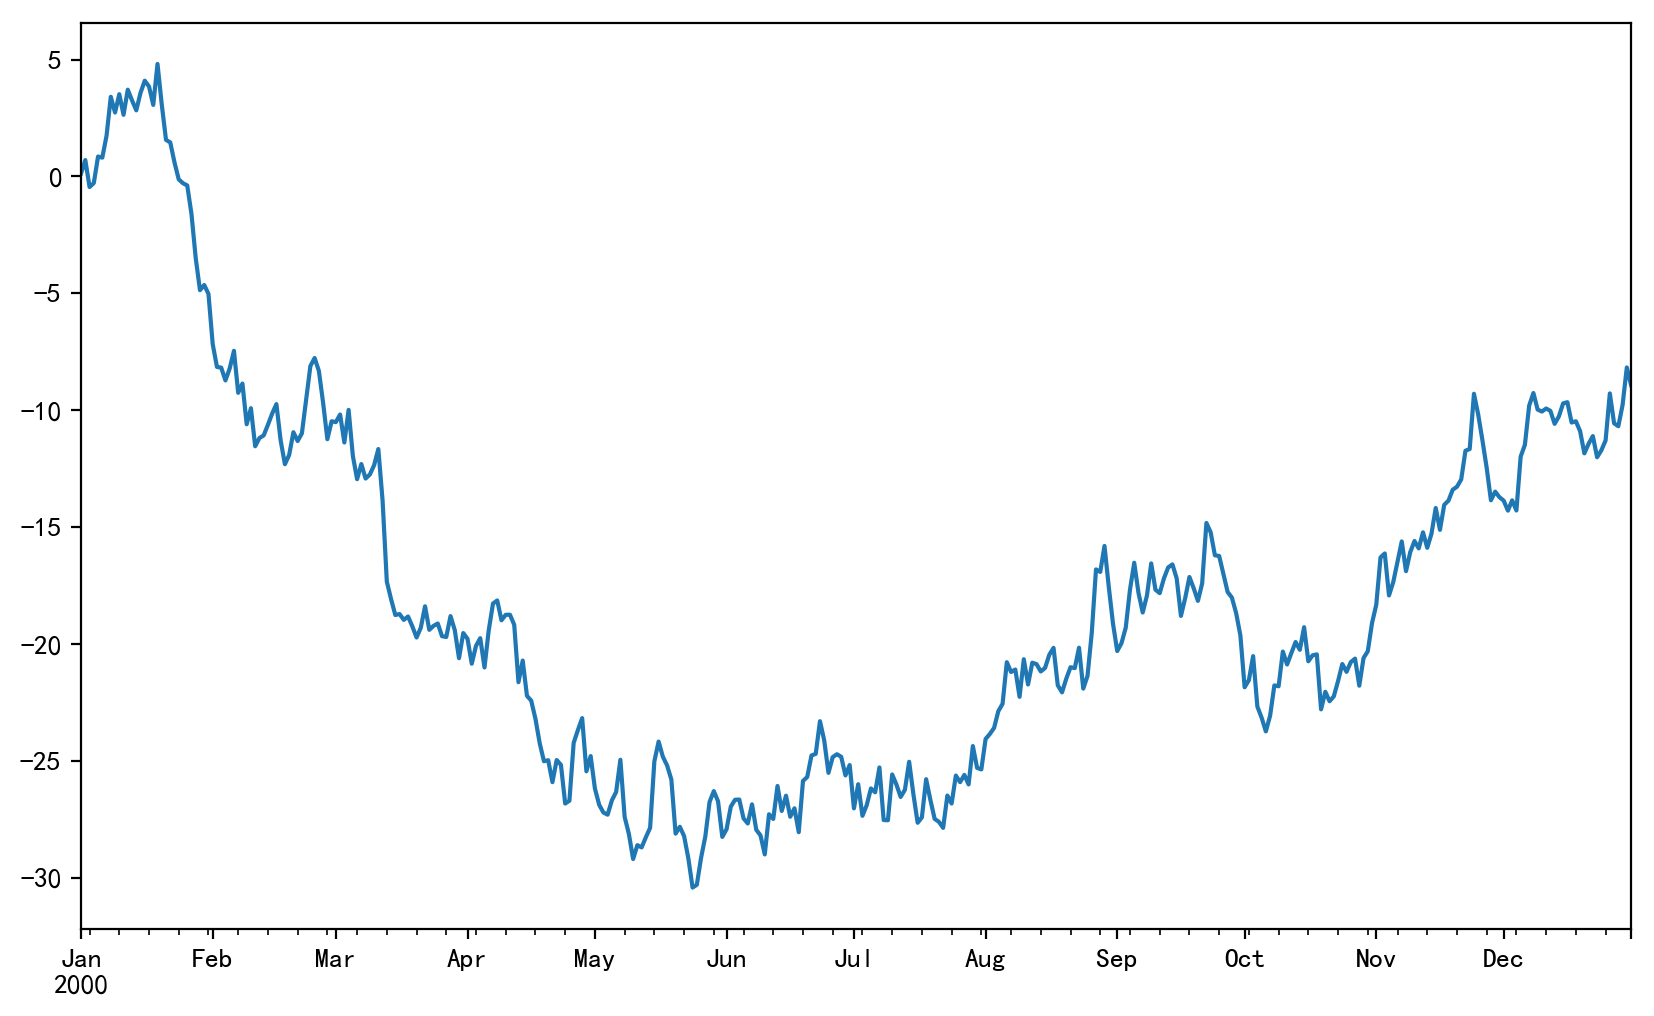

In [27]:
plt.figure(figsize=(10, 6), dpi=100)
cs = ts.cumsum()
cs.plot()
plt.show()

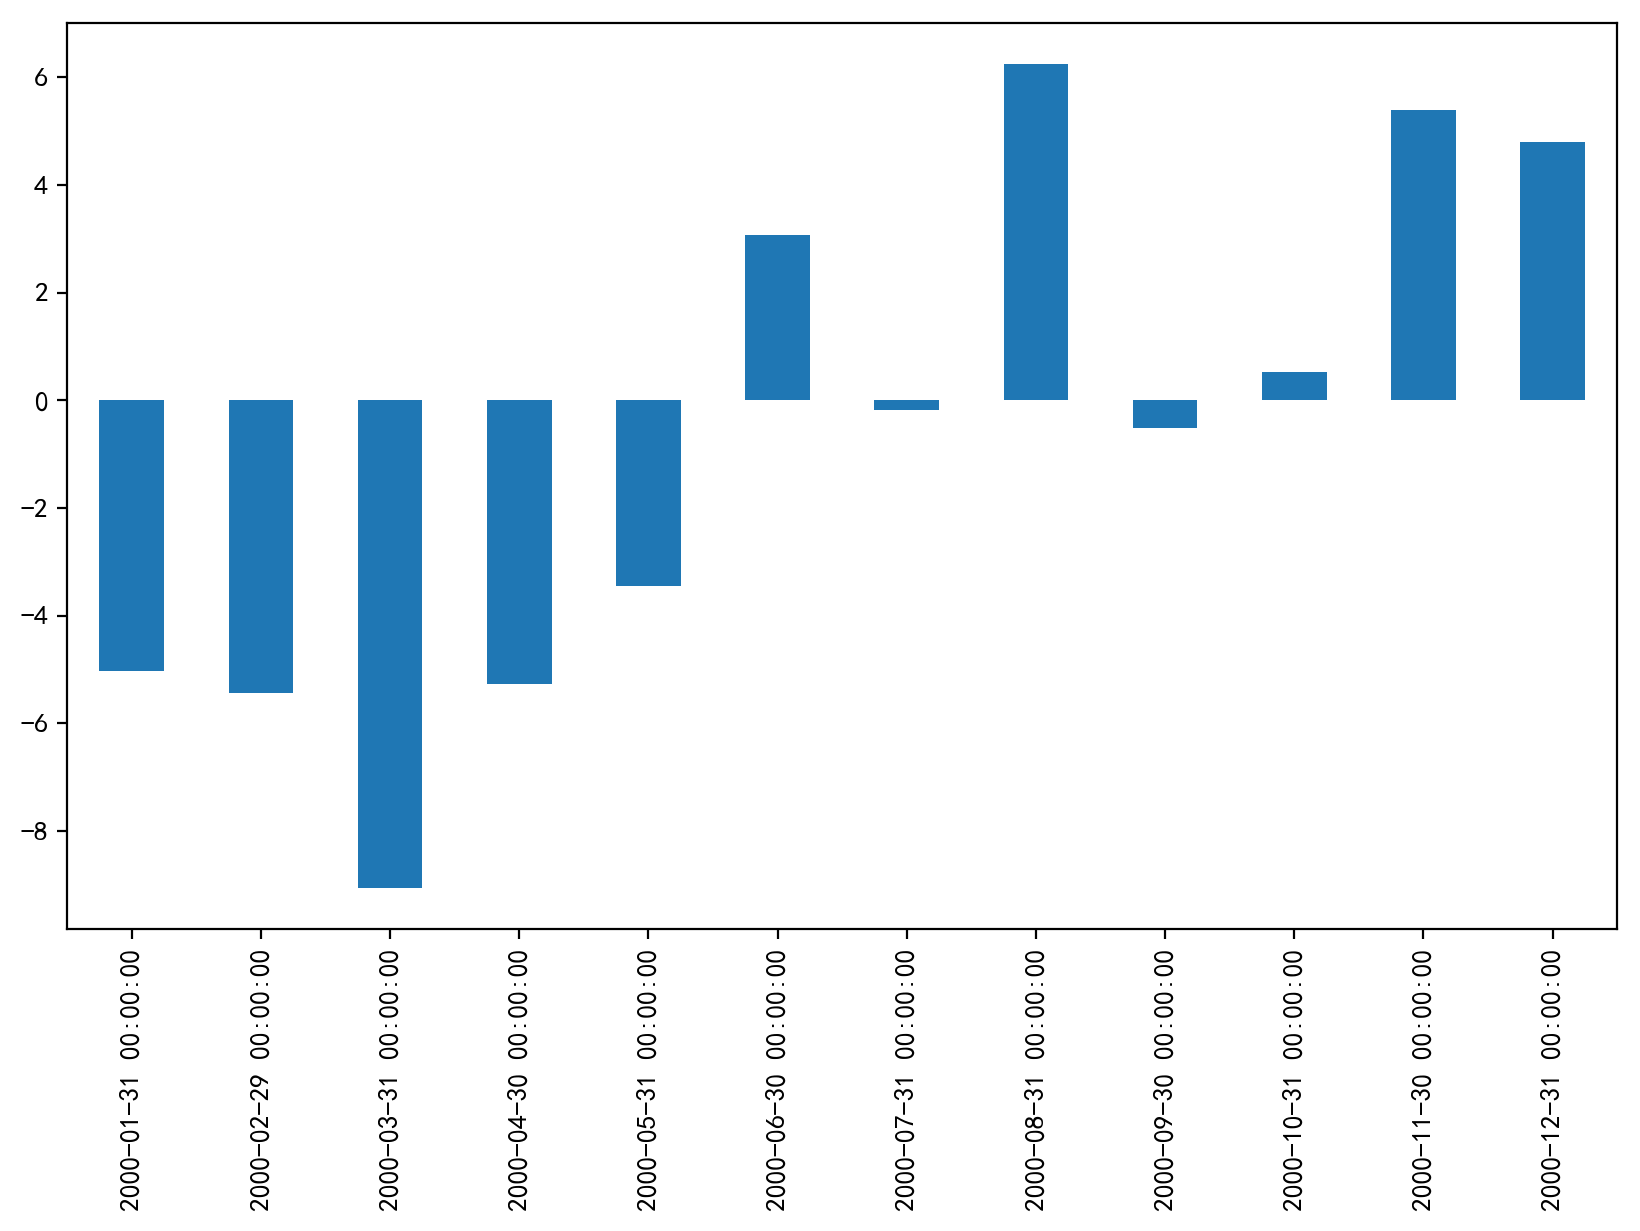

In [28]:
plt.figure(figsize=(10, 6), dpi=100)
ts.resample("1m").sum().plot.bar()
plt.show()

## 文件读写

In [29]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
df.to_csv('./data.csv')

In [30]:
# 可以看到，索引也被输出了
!head data.csv

,A,B,C,D
0,-0.2552778850825101,0.7196987779884166,-0.5931768371053788,0.5515945989272414
1,-0.25595026700529877,-0.3817005919565921,1.6702624059457782,1.232131635091103
2,-0.9278233408041637,-1.2623968489568778,0.5922918760198708,0.38954295469754247
3,-0.49863630024013383,2.561554717592564,0.11085026995859376,-0.5546972782225849
4,0.6962236828363612,0.5120109161469778,-1.4942399985674704,-0.0668976297910434
5,0.19754475516590936,-0.7888056674395924,1.7114183887503525,0.5985355343854857
6,-1.456356399472611,-1.1059895694019464,0.2746199048730047,1.514477016095757
7,-2.132869299483439,0.21394887504741927,1.7671619744580862,0.45053915192002986
8,1.8579986140011806,-0.5842383825381603,2.988084535383828,0.8136126657259471


上面，索引被输出成单独的一列，所以，读进来的时候，要设置哪一列是索引列。

In [31]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(5)

(100, 4)


,A,B,C,D
0,-0.255278,0.719699,-0.593177,0.551595
1,-0.255950,-0.381701,1.670262,1.232132
2,-0.927823,-1.262397,0.592292,0.389543
3,-0.498636,2.561555,0.110850,-0.554697
4,0.696224,0.512011,-1.494240,-0.066898


总结：其实 Pandas 读写和对数据的操作都比较死板，用多了，就熟悉了。要多查询，多用，用多了就觉得很简单了。